In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# 设置中文字体
plt.rcParams['font.sans-serif']=['SimHei']
#显示负号
matplotlib.rcParams['axes.unicode_minus']=False

# 1、函数语法：

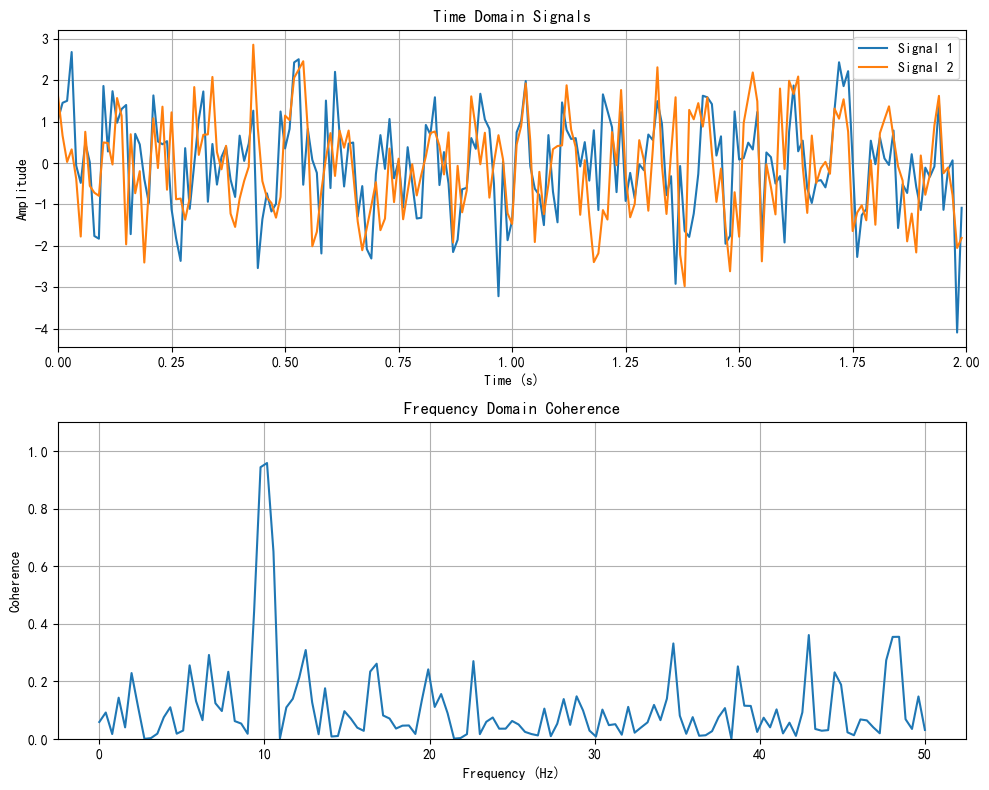

In [3]:
np.random.seed(19680801)
# 生成时间轴（0-30秒，采样间隔0.01秒）
dt = 0.01
t = np.arange(0, 30, dt)
# 生成高斯白噪声
nse1 = np.random.randn(len(t))
nse2 = np.random.randn(len(t))
# 创建两个含10Hz相干成分的信号
s1 = np.sin(2 * np.pi * 10 * t) + nse1  # 信号1：10Hz正弦波+噪声
s2 = np.sin(2 * np.pi * 10 * t) + nse2  # 信号2：相同频率正弦波+独立噪声

fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# 绘制时域波形（前2秒）
axs[0].plot(t[:200], s1[:200], label='Signal 1')
axs[0].plot(t[:200], s2[:200], label='Signal 2')
axs[0].set_xlim(0, 2)
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Amplitude')
axs[0].set_title('Time Domain Signals')
axs[0].legend()
axs[0].grid(True)

# 计算相干性（NFFT=256点FFT，采样频率1/dt=100Hz）
cxy, freqs = axs[1].cohere(s1, s2, NFFT=256, Fs=1/dt)
axs[1].set_ylabel('Coherence')
axs[1].set_xlabel('Frequency (Hz)')
axs[1].set_title('Frequency Domain Coherence')
axs[1].set_ylim(0, 1.1)  # 固定y轴范围便于比较
axs[1].grid(True)

plt.tight_layout()
plt.show()

# 2、使用示例：

### 示例 1：通过返回值标注数据

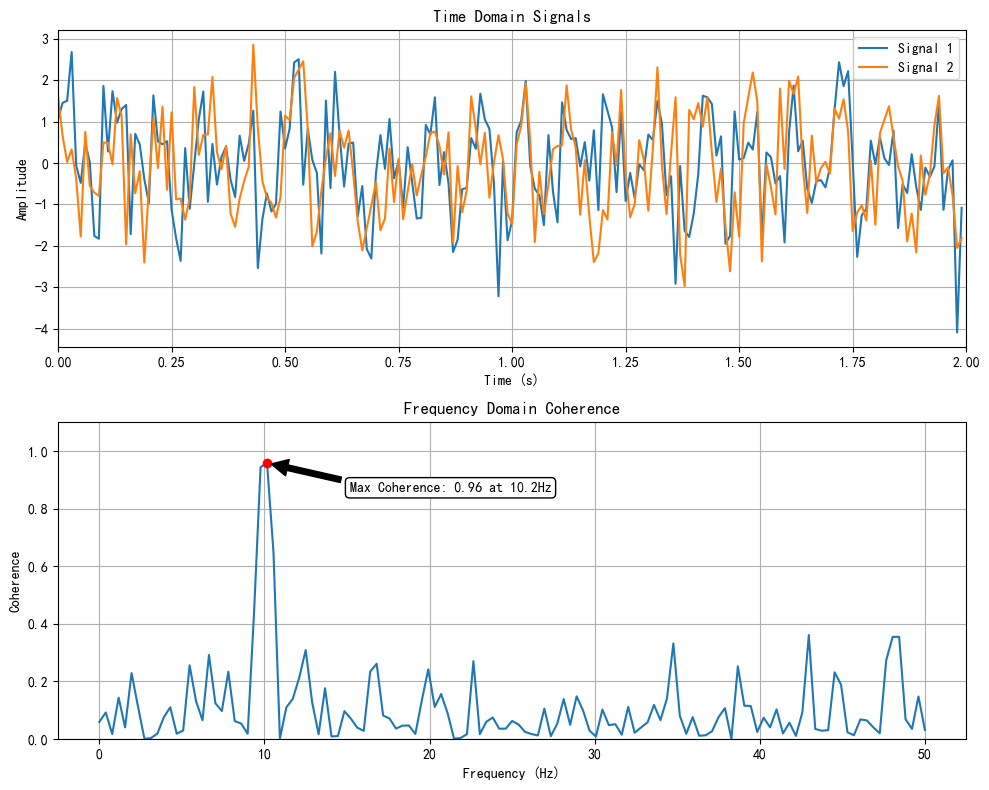

In [4]:
np.random.seed(19680801)
# 生成时间轴（0-30秒，采样间隔0.01秒）
dt = 0.01
t = np.arange(0, 30, dt)
# 生成高斯白噪声
nse1 = np.random.randn(len(t))
nse2 = np.random.randn(len(t))
# 创建两个含10Hz相干成分的信号
s1 = np.sin(2 * np.pi * 10 * t) + nse1  # 信号1：10Hz正弦波+噪声
s2 = np.sin(2 * np.pi * 10 * t) + nse2  # 信号2：相同频率正弦波+独立噪声

fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# 绘制时域波形（前2秒）
axs[0].plot(t[:200], s1[:200], label='Signal 1')
axs[0].plot(t[:200], s2[:200], label='Signal 2')
axs[0].set_xlim(0, 2)
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Amplitude')
axs[0].set_title('Time Domain Signals')
axs[0].legend()
axs[0].grid(True)

# 计算相干性（NFFT=256点FFT，采样频率1/dt=100Hz）
cxy, freqs = axs[1].cohere(s1, s2, NFFT=256, Fs=1/dt)

# 找到最大相干性对应的频率
max_coherence_idx = np.argmax(cxy)
max_freq = freqs[max_coherence_idx]
max_coherence = cxy[max_coherence_idx]

# 在图上标注最大相干性点
axs[1].plot(max_freq, max_coherence, 'ro')  # 红色圆点标记
axs[1].annotate(f'Max Coherence: {max_coherence:.2f} at {max_freq:.1f}Hz',
                xy=(max_freq, max_coherence),
                xytext=(max_freq+5, max_coherence-0.1),
                arrowprops=dict(facecolor='black', shrink=0.05),
                bbox=dict(boxstyle="round", fc="w"))

axs[1].set_ylabel('Coherence')
axs[1].set_xlabel('Frequency (Hz)')
axs[1].set_title('Frequency Domain Coherence')
axs[1].set_ylim(0, 1.1)  # 固定y轴范围便于比较
axs[1].grid(True)

plt.tight_layout()
plt.show()